In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
data = fetch_california_housing()
X, y = data.data, data.target

In [7]:

print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [6]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [17]:
class GDRegressor:
    
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []
        
    def fit(self, X_train, y_train):
        # Initialize parameters
        self.intercept_ = 0
        self.coef_ = np.zeros(X_train.shape[1])
        
        for epoch in range(self.epochs):
            # Calculate predictions
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
            
            # Calculate gradients
            error = y_train - y_hat
            intercept_der = -2 * np.mean(error)
            coef_der = -2 * np.dot(X_train.T, error) / X_train.shape[0]
            
            # Update parameters
            self.intercept_ -= self.lr * intercept_der
            self.coef_ -= self.lr * coef_der
            
            # Track loss
            loss = np.mean(error**2)
            self.loss_history.append(loss)
            
            # Print progress every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [ ]:
# Train and Evaluate
print("\nCustom GDRegressor:")
gd_reg = GDRegressor(learning_rate=0.1, epochs=1000)
gd_reg.fit(X_train, y_train)

print("\nFinal Coefficients:", gd_reg.coef_)
print("Final Intercept:", gd_reg.intercept_)

gd_pred = gd_reg.predict(X_test)
print("R2 Score:", r2_score(y_test, gd_pred))


Custom GDRegressor:
Epoch 0: Loss = 5.5922
Epoch 100: Loss = 0.5281
Epoch 200: Loss = 0.5224
Epoch 300: Loss = 0.5220
Epoch 400: Loss = 0.5220
Epoch 500: Loss = 0.5220
Epoch 600: Loss = 0.5220
Epoch 700: Loss = 0.5220
Epoch 800: Loss = 0.5220
Epoch 900: Loss = 0.5220

Final Coefficients: [ 0.83771499  0.11485047 -0.28122721  0.29358987 -0.00759605 -0.04253839
 -0.8799141  -0.85052271]
Final Intercept: 2.067881672445035
R2 Score: 0.6013844380829201


In [19]:
#  Scikit-Learn Baseline
print("\nScikit-Learn LinearRegression:")
sk_reg = LinearRegression()
sk_reg.fit(X_train, y_train)
print("Coefficients:", sk_reg.coef_)
print("Intercept:", sk_reg.intercept_)


Scikit-Learn LinearRegression:
Coefficients: [ 0.837698    0.11484758 -0.28119462  0.29356437 -0.00759676 -0.04253754
 -0.87995159 -0.85055823]
Intercept: 2.067881726364905


In [16]:
sk_pred = sk_reg.predict(X_test)
print("R2 Score:", r2_score(y_test, sk_pred))

R2 Score: 0.6013853272055153


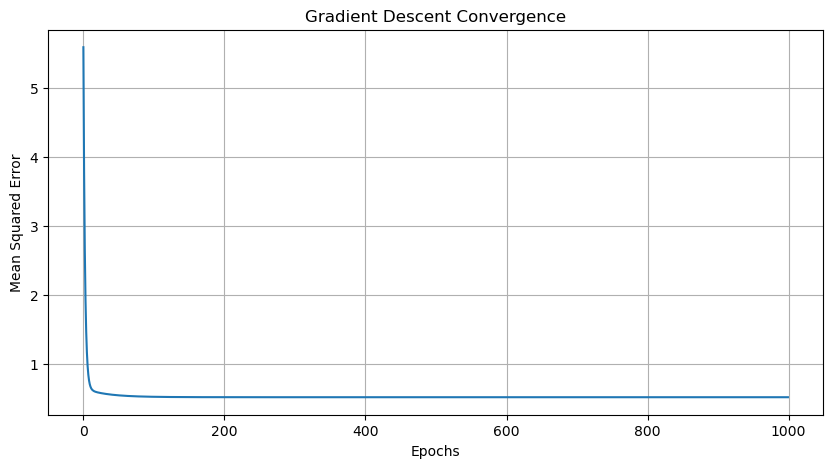

In [21]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(gd_reg.loss_history)
plt.title("Gradient Descent Convergence")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

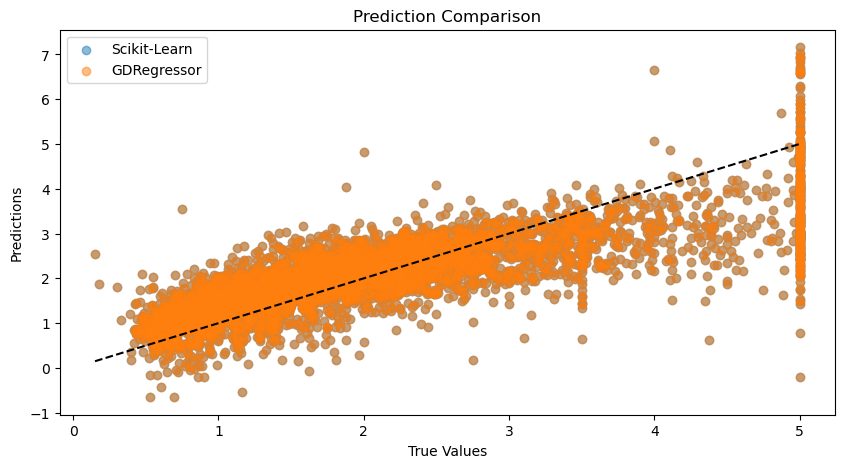

In [24]:
# Compare predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, sk_pred, alpha=0.5, label='Scikit-Learn')
plt.scatter(y_test, gd_pred, alpha=0.5, label='GDRegressor')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Prediction Comparison")
plt.legend()
plt.show()